# MBA FIAP Inteligência Artificial & Machine Learning

![Image of Dementia](img/ml.png)

## Programando IA com Python
## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Adriana Matsubara             | RM 330570      | `1IA` |
| Bruno Gonçalves de Aquino     | RM 330326      | `1IA` |
| Vinicius da Fonseca Simioni   | RM 330400      | `1IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos e, até mesmo, trechos de código-fonte.

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação** 

Carregue o dataset "automobile-mod.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

O dataset original "automobile.csv" se encontra na mesma pasta apenas como referência. Não deverá ser utilizado.

__Atualizado em 16/07/2017__

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

%matplotlib inline
random.seed( 3 )

In [2]:
#IMPLEMENTAR
df_auto = pd.read_csv("./data/automobile-mod.csv", sep=';')
df_auto.head(10)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipóteses ou outras que o grupo julgue relevante.

Para avaliar a correlação entre os parâmetros citados e o preço, usaremos a função **corr**.

Primeiro, vamos visualizar a correlação de todos os dados graficamente.

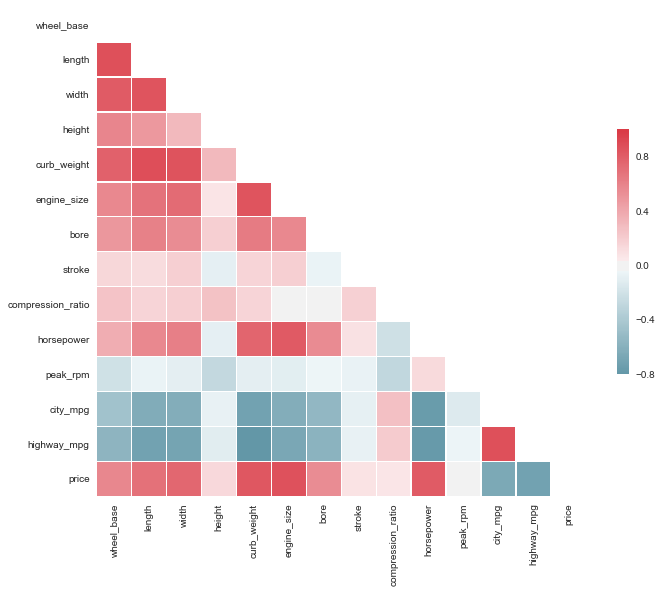

In [3]:
#IMPLEMENTAR

# Calculo da correlacao
correlacao = df_auto.corr()

# Apresentando as correlacoes graficamente
sns.set(style="white")

## Generate a mask for the upper triangle
mask = np.zeros_like(correlacao, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

## Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

## Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

## Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Observando o gráfico, podemos observar todos os parâmetros que têm forte correlação direta (vermelho escuro) ou inversamente (azul escuro) proporcial.

Agora, vamos filtrar para apenas os parâmetros do exercicio. Consideraremos que:

 * O consumo é dado pelos parâmetros **city_mpg** e **highway_mpg**.
 * O tamanho é dado pelos parâmetros **length**, **width** e **height**.
 * A força é dada pelo parâmetro **horsepower**.

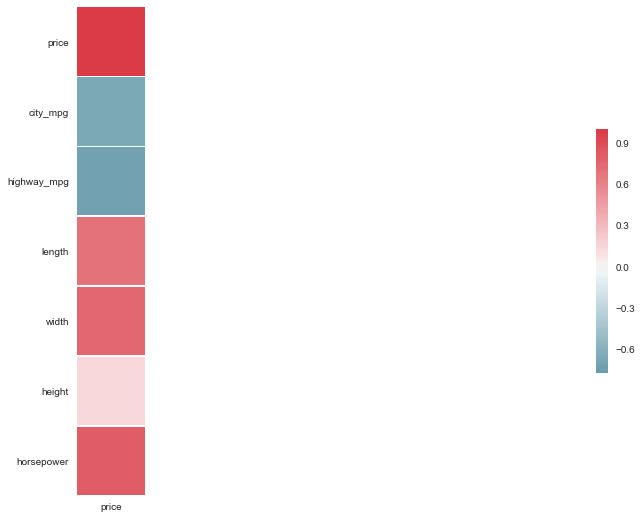

In [4]:
#IMPLEMENTAR

# Correlacao filtrada
df_corr = df_auto[["price", "city_mpg", "highway_mpg", "length", "width", "height", "horsepower"]]

# Calculo da correlacao
correlacao = df_corr.corr()

# Apresentando as correlacoes graficamente
sns.set(style="white")

## Generate a mask for the upper triangle
mask = np.ones_like(correlacao, dtype=np.bool)
mask[:,0] = False

## Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

## Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

## Draw the heatmap with the mask and correct aspect ratio
df_heatmap = sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=1.0, center=0,
                            square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=["price"])
df_heatmap.set_yticklabels(df_heatmap.get_yticklabels(), rotation=0)
plt.show(df_heatmap)

Do gráfico acima, vemos que a correlação diretamente proporcional mais alta é com a força, e a correlação inversamente proporcional (a única) mais alta é com o consumo.

Podemos ver a mesma informação em valores numéricos abaixo.

In [5]:
df_corr = df_auto[["price", "city_mpg", "highway_mpg", "length", "width", "height", "horsepower"]]
correlacao = df_corr.corr()
correlacao[["city_mpg", "highway_mpg", "length", "width", "height", "horsepower"]].head(1)

,city_mpg,highway_mpg,length,width,height,horsepower
price,-0.657661,-0.712812,0.690628,0.751265,0.135486,0.810795


A partir dos resultados acima, podemos concluir que:

 * O preço é inversamente proporcional ao consumo na cidade e possui uma correlação relevante.
 * O preço é inversamente proporcional ao consumo na estrada e possui uma correlação relevante.
 * O preço é diretamente proporcional ao comprimento e possui uma correlação relevante.
 * O preço é diretamente proporcional à largura e possui uma correlação relevante.
 * O preço é diretamente proporcional à altura e possui uma correlação muito baixa.
 * O preço é diretamente proporcional aos cavalos de força e possui a correlação mais alta em comparação aos outros parâmetros.

**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:**

* Cenário 1: No geral, pessoas dispostas a pagar preços altos por um automóvel se preocupam mais com a potência (horsepower) para atingir maiores velocidades do que com o consumo. Isso inclusive, é característica de muitos carros de luxo. Por isso, até que faz sentido a relação da potência com o preço ser alta e diretamente proporcional e a relação entre o consumo e o preço ser inversamente proporcional.
* Cenário 2: Carros maiores estão diretamente relacionados à ideia de conforto e à possibilidade de se carregar mais carga, pessoas e itens de ostentação (como frigobars), por isso costumam ser valorizados. Por exemplo, sabemos que uma limusine ou um SUV costumam ser mais caros que um sedan. Então, faz sentido o comprimento e a largura terem alta relação e serem diretamente proporcionais ao preço. 
* Cenário 3: Considerando a justificativa do item anterior, faz sentido que a correlação entre altura e preço seja diretamente proporcional. Porém, também faz sentido que essa correlação seja baixa, porque não existe uma grande variação de altura entre os automóveis em geral e, dado que as pessoas passam a maior parte do tempo sentadas, uma altura maior não traria tantas vantagens.

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

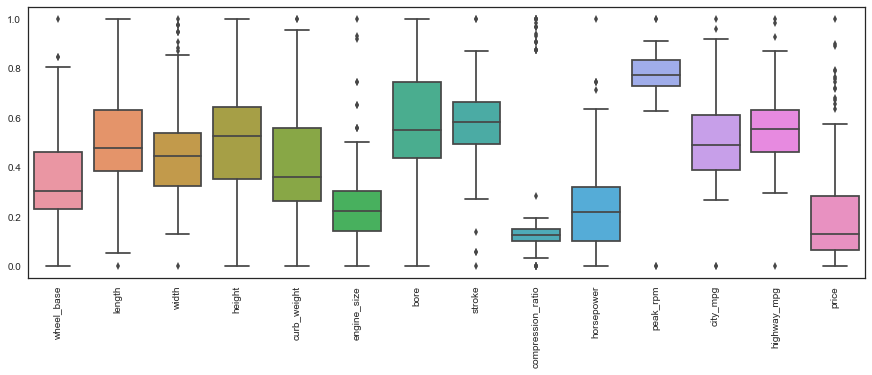

In [6]:
#IMPLEMENTAÇÃO

# Selecionando apenas colunas numericas
df_numerico = df_auto.select_dtypes(['number'])

# Normalizando os dados usando min_max
df_normalizado = (df_numerico-df_numerico.min())/(df_numerico.max()-df_numerico.min())

# Fazendo o boxplot para identificar outliers
fig, ax = plt.subplots(figsize=(15.0, 5))
df_boxplot = sns.boxplot(data=df_normalizado)
df_boxplot.set_xticklabels(df_boxplot.get_xticklabels(),rotation=90)
plt.show(df_boxplot)

**Comentário:** Com o boxplot já conseguimos identificar quais atributos têm maiores outliers e como está a distribuição (densidade) dos dados em cada atributo. O atributo 'compression_ratio', por exemplo, é o que parece ter os maiores outliers, por possuir pontos fora da destribuição. Podemos observar também que o atributo 'engine_size' não possui outliers e a distribuição dos dados é mais equilibrada.

Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [7]:
#IMPLEMENTAÇÃO
df_auto.isnull().sum()

make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               2
city_mpg               1
highway_mpg            1
price                  0
dtype: int64

Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

In [8]:
#IMPLEMENTAÇÃO
# Substituindo os valores pela media da coluna correspondente.
# Como os nulos apenas existem em colunas numericas, podemos usar este metodo.
# Caso contrario, poderiamos pegar o valor da linha anterior (fillna(method='ffill')) ou da proxima (fillna(method='bfill')).
df_sem_nulos = df_auto.fillna(df_auto.mean())


### Análise de valores com valores iguais a 0

Analise se no conjunto de dados há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [9]:
#IMPLEMENTAÇÃO
# Tabela de "nome da coluna X qtd. de zeros"
print(df_auto[df_auto==0].count())

make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               2
city_mpg               2
highway_mpg            1
price                  0
dtype: int64


In [10]:
# Linhas que tiveram zero.
df_auto.loc[(df_auto==0).any(axis=1)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,NaN,6529
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,92,1bbl,2.92,3.41,9.2,76,0.0,30.0,34.0,7295
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,0.0,25.0,28176
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,0.0,31600
181,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,9.0,85,5250.0,0.0,34.0,8195


Na tabela acima, podemos ver que os campos que estão zerados não têm muito sentido em estarem assim.

 * Há duas linhas em que o peak_rpm está zerado. A não seja característica do carro ele nem andar (absurdo!), isto está errado.
 * Há duas linhas em que o city_mpg está zerado. Como sabemos que eles tem medidas para a estrada e que carros não reconhecem a diferença entre andar na cidade e na estrada, afirmar que estes valores estão zero também é absurdo.
 * Há uma linha em que o highway_mpg está zerado. É absurdo pelo mesmo motivo do item anterior, trocando-se a cidade pela estrada e vice-versa.

A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.

Como os valores parecem ser extraídos majoritariamente de especificações e manuais (fonte: https://archive.ics.uci.edu/ml/datasets/Automobile), a média parece um bom valor para se realizar a substituição.

In [11]:
#IMPLEMENTAÇÃO
df_sem_nulos_ou_zeros = df_sem_nulos.replace(0, df_sem_nulos.mean())
print(df_sem_nulos.mean())

df_sem_nulos_ou_zeros.loc[[32,35,66,67,181]]

wheel_base              98.797015
length                 174.200995
width                   65.889055
height                  53.766667
curb_weight           2555.666667
engine_size            126.875622
bore                     3.329701
stroke                   3.261741
compression_ratio       10.164279
horsepower             103.263682
peak_rpm              5062.814070
city_mpg                24.925000
highway_mpg             30.545000
price                13207.129353
dtype: float64


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,5062.81407,30.000,30.545,6529
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,92,1bbl,2.92,3.41,9.2,76,5062.81407,30.000,34.000,7295
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,183,idi,3.58,3.64,21.5,123,4350.00000,24.925,25.000,28176
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,183,idi,3.58,3.64,21.5,123,4350.00000,22.000,30.545,31600
181,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,9.0,85,5250.00000,24.925,34.000,8195


### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva a fim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q2 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [12]:
def identificacao_outlier(df, column_name): 
    print("COLUNA '" + column_name + "'")
    
    #IMPLEMENTAÇÃO
    q1 = np.percentile(df[column_name], 25)
    q3 = np.percentile(df[column_name], 75)
    iqr = q3 - q1
    basis = 5
    
    lower_limit = q1 - (basis * iqr)
    upper_limit = q3 + (basis * iqr)
    
    outlier_lower = df[df[column_name] < lower_limit]
    outlier_upper = df[df[column_name] > upper_limit]
    
    all_outliers = outlier_lower.append(outlier_upper)   
    
    print("Valor mínimo: " + str(df[column_name].min()))
    print("Valor máximo: " + str(df[column_name].max())) 
    print("Valor média: " + str(df[column_name].mean())) 
    print("Q1: " + str(q1))
    print("Q3: " + str(q3))
    print("5*(Q3-Q1): " + str((basis * iqr)))   
    print("Limite inferior: " + str(lower_limit))
    print("Limite superior: " + str(upper_limit))
    if all_outliers.empty:
        print("Sem outliers!!!")
    else:
        print("Lista de outliers:")
        print(all_outliers)
        
    return(all_outliers)

Identificando os outliers:

In [13]:
# Selecionando apenas as colunas numericas...
df_numericos_sem_nulos_ou_zeros = df_sem_nulos_ou_zeros.select_dtypes(['number'])

for coluna in df_numericos_sem_nulos_ou_zeros.columns.values: 
    identificacao_outlier(df_sem_nulos_ou_zeros, coluna)
    print("\n-------------------------------------------------------------------\n")

COLUNA 'wheel_base'
Valor mínimo: 86.6
Valor máximo: 120.9
Valor média: 98.7970149253732
Q1: 94.5
Q3: 102.4
5*(Q3-Q1): 39.50000000000003
Limite inferior: 54.99999999999997
Limite superior: 141.90000000000003
Sem outliers!!!

-------------------------------------------------------------------

COLUNA 'length'
Valor mínimo: 141.1
Valor máximo: 208.1
Valor média: 174.20099502487582
Q1: 166.8
Q3: 183.5
5*(Q3-Q1): 83.49999999999994
Limite inferior: 83.30000000000007
Limite superior: 266.99999999999994
Sem outliers!!!

-------------------------------------------------------------------

COLUNA 'width'
Valor mínimo: 60.3
Valor máximo: 72.0
Valor média: 65.88905472636813
Q1: 64.1
Q3: 66.6
5*(Q3-Q1): 12.5
Limite inferior: 51.599999999999994
Limite superior: 79.1
Sem outliers!!!

-------------------------------------------------------------------

COLUNA 'height'
Valor mínimo: 47.8
Valor máximo: 59.8
Valor média: 53.766666666666715
Q1: 52.0
Q3: 55.5
5*(Q3-Q1): 17.5
Limite inferior: 34.5
Limite s

A partir do resultado acima, é possível concluir que, seguindo o critério com a base 5, apenas a coluna **compression_ratio** apresentou outliers.

Abaixo, veremos a distribuição dos dados referentes a esta coluna e a força da sua correlação com o preço (target), antes e após a remoção dos outliers.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


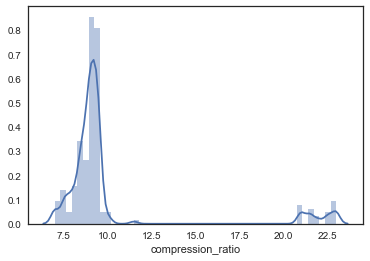

In [14]:
sns.distplot(df_numericos_sem_nulos_ou_zeros["compression_ratio"]);

In [15]:
df_corr_compression_ratio = df_auto[["price", "compression_ratio"]]
correlacao_compression_ratio = df_corr_compression_ratio.corr()
correlacao_compression_ratio.head(1)

,price,compression_ratio
price,1.0,0.071107


COLUNA 'compression_ratio'
Valor mínimo: 7.0
Valor máximo: 23.0
Valor média: 10.164278606965176
Q1: 8.6
Q3: 9.4
5*(Q3-Q1): 4.0000000000000036
Limite inferior: 4.599999999999996
Limite superior: 13.400000000000004
Lista de outliers:
              make fuel_type aspiration number_of_doors body_style  \
60           mazda    diesel        std            four      sedan   
63           mazda    diesel        std            four      sedan   
64   mercedes-benz    diesel      turbo            four      sedan   
65   mercedes-benz    diesel      turbo            four      wagon   
66   mercedes-benz    diesel      turbo             two    hardtop   
67   mercedes-benz    diesel      turbo            four      sedan   
87          nissan    diesel        std             two      sedan   
105         peugot    diesel      turbo            four      sedan   
107         peugot    diesel      turbo            four      wagon   
109         peugot    diesel      turbo            four      sedan  

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


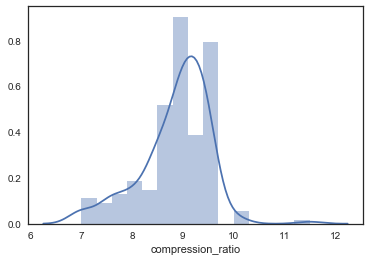

In [16]:
outliers = identificacao_outlier(df_sem_nulos_ou_zeros, "compression_ratio")
df_sem_nulos_ou_zeros_sem_outliers = df_sem_nulos_ou_zeros.drop(outliers.index.values)
sns.distplot(df_sem_nulos_ou_zeros_sem_outliers["compression_ratio"]);

In [17]:
df_corr_compression_ratio_sem_outliers = df_sem_nulos_ou_zeros_sem_outliers[["price", "compression_ratio"]]
correlacao_compression_ratio_sem_outliers = df_corr_compression_ratio_sem_outliers.corr()
correlacao_compression_ratio_sem_outliers.head(1)

,price,compression_ratio
price,1.0,-0.190611


**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:**
Sim, houve e devem ser removidos. Pelo gráfico de distribuição antes da remoção de outliers, vemos que existe uma distância significativa entre a maior parte dos dados e eles. Além disso, vemos que há um bom aumento no valor absoluto e até mesmo uma inversão da correlação entre o **price** (target) e o **compression_ratio** quando os removemos, o que reforça a distorção causada por seus valores. Também podemos notar que todos esses carros são movidos a diesel. Talvez seja melhor haver uma análise separada entre grupos que usam diesel e grupos que usam outros combustíveis.

### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [18]:
#IMPLEMENTAÇÃO

def mapear_serie(serie):
    dict_gen = {}
    
    #IMPLEMENTAÇÃO
    for idx, val in enumerate(serie):
        dict_gen[val] = idx
    
    return dict_gen

Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [19]:
print(mapear_serie(df_sem_nulos_ou_zeros_sem_outliers["make"].unique()))

{'alfa-romero': 0, 'audi': 1, 'bmw': 2, 'chevrolet': 3, 'dodge': 4, 'honda': 5, 'isuzu': 6, 'jaguar': 7, 'mazda': 8, 'mercedes-benz': 9, 'mercury': 10, 'mitsubishi': 11, 'nissan': 12, 'peugot': 13, 'plymouth': 14, 'porsche': 15, 'renault': 16, 'saab': 17, 'subaru': 18, 'toyota': 19, 'volkswagen': 20, 'volvo': 21}


In [20]:
df_sem_nulos_ou_zeros_sem_outliers.head(10)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


In [21]:
# IMPLEMENTAÇÃO 
df_sem_nulos_ou_zeros_sem_outliers_categorica_convertida = df_sem_nulos_ou_zeros_sem_outliers
for coluna in df_sem_nulos_ou_zeros_sem_outliers.select_dtypes(['object']).columns.values:
    df_sem_nulos_ou_zeros_sem_outliers_categorica_convertida = df_sem_nulos_ou_zeros_sem_outliers_categorica_convertida.replace({coluna: mapear_serie(df_sem_nulos_ou_zeros_sem_outliers_categorica_convertida[coluna].unique())})

Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diese", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [22]:
#IMPLEMENTAÇÃO
df_sem_nulos_ou_zeros_sem_outliers_categorica_convertida.head(20)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,0,0,0,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,0,0,0,0,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,0,0,0,0,1,0,0,94.5,171.2,65.5,...,152,0,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,1,0,0,1,2,1,0,99.8,176.6,66.2,...,109,0,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,1,0,0,1,2,2,0,99.4,176.6,66.4,...,136,0,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,1,0,0,0,2,1,0,99.8,177.3,66.3,...,136,0,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,1,0,0,1,2,1,0,105.8,192.7,71.4,...,136,0,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,1,0,0,1,3,1,0,105.8,192.7,71.4,...,136,0,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,1,0,1,1,2,1,0,105.8,192.7,71.4,...,131,0,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,2,0,0,0,2,0,0,101.2,176.8,64.8,...,108,0,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Resposta:**
 
 * **Regressão Linear**: A partir da plotagem de todos os dados, tenta traçar uma linha de predição. Esta linha pode ser representada pela equação __y = a0 + a1*x1 + a2*x2 + ... + an*xn__, em que __y__ é o valor target, __x__ são os valores dos parâmetros de entrada distintos e __a__ são os coeficientes que representam o gradiente (tendência da curva) em relação à variável correspondente. Os valores de __a__ são calculados de forma a minimizar a soma do valor absoluto de todos os desvios em relação aos dados utilizados para o treino. Exemplo de uso: predição de preços de imóveis, predição de valores de ações. Usado para estimativas com valores contínuos.
 * **Regressão de árvore de decisão**: A partir das probabilidades de ocorrência de eventos correlacionados em relação a uma variável target, desenha um grafo em forma de árvore. A árvore é formada por nós, que representam condições, e estes se expandem de cima para baixo, partindo de um único nó, chamado de raiz. Todos eles são interligados de maneira não circular por arestas, que representam todos os possíveis resultados de eventos que interligam um nó a outro. Um nó que não se divide mais é chamado de __folha__ e representa a probabilidade final da cadeia de eventos que o antecedem. A soma de todas as folhas representa todos os resultados possíveis (100%).
 * **Regressão Ridge**: É uma técnica usada visando resolver o problema da **multicolinearidade** na predição, o qual ocorre quando dois atributos altamente correlacionados entre si são usados para se fazer a estimativa do mesmo target, provocando um overfit. Os dados são recalculados, inserindo-se um bias que tenta amenizar os efeitos da multicolinearidade.
 

Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e qual seria o atributo preditor?

Para selecionar o atributo preditor, temos que verificar quais atributos possuem correlação forte com o target.

In [23]:
#IMPLEMENTAÇÃO
pd.options.display.max_columns = None
display(df_sem_nulos_ou_zeros_sem_outliers_categorica_convertida.corr())

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
make,1.000000,NaN,0.047992,0.146790,0.171238,0.009545,0.059940,0.096454,0.133227,0.011832,0.240531,0.045172,0.151767,-0.236827,-0.055349,-0.198416,0.316128,-0.233757,0.097112,-0.021085,-0.186574,0.002163,0.002754,-0.145696
fuel_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,0.047992,NaN,1.000000,-0.077368,-0.088518,0.033684,-0.049532,0.043437,0.077195,0.143874,-0.095476,0.172794,-0.014008,-0.106671,0.032268,0.307010,0.187872,0.122716,-0.631328,0.324170,0.057671,-0.271652,-0.273325,0.081814
number_of_doors,0.146790,NaN,-0.077368,1.000000,0.469755,0.161478,-0.139507,0.438063,0.392944,0.204500,0.544500,0.178645,0.047392,-0.108619,0.012740,-0.227128,0.114982,-0.078248,-0.069596,-0.082958,-0.182312,-0.063740,-0.064032,0.023956
body_style,0.171238,NaN,-0.088518,0.469755,1.000000,-0.003593,0.138100,0.337896,0.358469,0.163640,0.459731,0.208477,0.145528,-0.013543,0.157750,-0.244215,0.226018,-0.066996,0.040452,0.090171,-0.080890,-0.133911,-0.136510,0.141689
drive_wheels,0.009545,NaN,0.033684,0.161478,-0.003593,1.000000,-0.163129,-0.401482,-0.451040,-0.429981,0.109799,-0.544550,0.267878,-0.321177,-0.495833,0.199739,-0.432743,-0.045363,-0.030936,-0.566325,-0.062918,0.492748,0.478397,-0.563027
engine_location,0.059940,NaN,-0.049532,-0.139507,0.138100,-0.163129,1.000000,-0.199580,-0.047604,-0.046332,-0.104359,0.066299,0.341358,0.055266,0.208991,-0.081127,0.202789,-0.135503,0.124377,0.348931,0.218115,-0.160441,-0.105283,0.354566
wheel_base,0.096454,NaN,0.043437,0.438063,0.337896,-0.401482,-0.199580,1.000000,0.862985,0.789270,0.543042,0.742252,-0.200200,0.285118,0.558880,-0.338243,0.468996,0.058694,-0.260381,0.421946,-0.235076,-0.560214,-0.603363,0.559542
length,0.133227,NaN,0.077195,0.392944,0.358469,-0.451040,-0.047604,0.862985,1.000000,0.844291,0.441064,0.869347,-0.226762,0.307415,0.678038,-0.376290,0.603752,0.052728,-0.245210,0.623615,-0.168068,-0.753175,-0.758105,0.679480
width,0.011832,NaN,0.143874,0.204500,0.163640,-0.429981,-0.046332,0.789270,0.844291,1.000000,0.227689,0.845319,-0.200432,0.469206,0.724689,-0.284535,0.535196,0.117073,-0.268167,0.668265,-0.117128,-0.723449,-0.748404,0.732579


**Obs**: O fueltype só tem um valor (gas = 0), por conta disso não terá correlação com nenhuma outra coluna.

Vamos selecionar os 6 atributos com as maiores correlações (valores próximos de -1 ou 1).

 * engine_size:  0.871846
 * horsepower:   0.843794
 * curb_weight:  0.832041
 * highway_mpg: -0.740402
 * city_mpg:    -0.732776
 * width:        0.732579
 * length:       0.679480
 
Como sabemos que o uso de atributos com grande correlação entre si pode causar um overfit, vamos analisar a correlação entre os parâmetros selecionados.

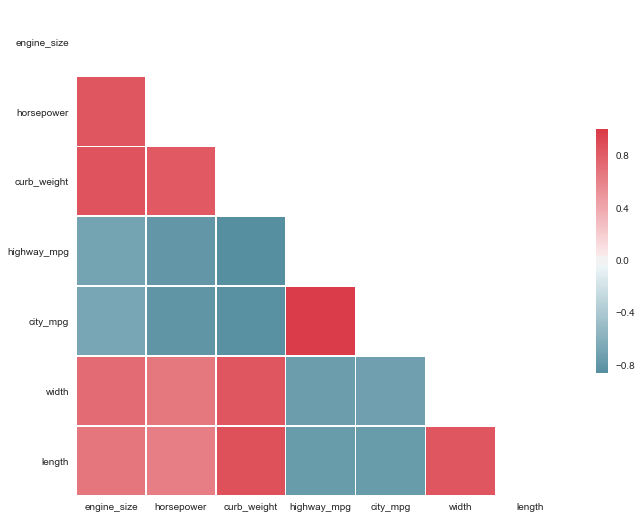

,engine_size,horsepower,curb_weight,highway_mpg,city_mpg,width,length
engine_size,1.000000,0.841889,0.855420,-0.703442,-0.681189,0.724689,0.678038
horsepower,0.841889,1.000000,0.825300,-0.802196,-0.812387,0.668265,0.623615
curb_weight,0.855420,0.825300,1.000000,-0.868328,-0.846414,0.845319,0.869347
highway_mpg,-0.703442,-0.802196,-0.868328,1.000000,0.974002,-0.748404,-0.758105
city_mpg,-0.681189,-0.812387,-0.846414,0.974002,1.000000,-0.723449,-0.753175
width,0.724689,0.668265,0.845319,-0.748404,-0.723449,1.000000,0.844291
length,0.678038,0.623615,0.869347,-0.758105,-0.753175,0.844291,1.000000


In [24]:
#IMPLEMENTAR

# Calculo da correlacao
correlacao = df_sem_nulos_ou_zeros_sem_outliers_categorica_convertida[["engine_size", "horsepower", "curb_weight", "highway_mpg", "city_mpg", "width", "length"]].corr()

# Apresentando as correlacoes graficamente
sns.set(style="white")

## Generate a mask for the upper triangle
mask = np.zeros_like(correlacao, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

## Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

## Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

## Draw the heatmap with the mask and correct aspect ratio
df_heatmap = sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

df_heatmap.set_yticklabels(df_heatmap.get_yticklabels(), rotation=0)
plt.show(df_heatmap)

correlacao

Os dados acima nos permitem notar que existem correlações muito fortes entre os parâmetros selecionados, o que pode causar o overfit.

Vamos tentar minimizar isso, pegando o parâmetro com mais correlação e outro no grupo que tenha uma das menores correlações com este e alta correlação com o target.

Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros

Através de testes com diversas combinações dos parâmetros selecionados acima, concluímos que a melhor combinação de todas que testamos é "engine_size", "horsepower", "curb_weight". As outras que testamos (como "engine_size", "horsepower", "curb_weight", "highway_mpg", "width" e "length") apresentaram muitas variações entre os dados de treino e de testes e a pontuação, por vezes, ficava extremamente negativa e incondizente com o esperado.

In [25]:
from sklearn.model_selection import train_test_split

#IMPLEMENTAÇÃO

X = df_sem_nulos_ou_zeros_sem_outliers_categorica_convertida[["engine_size", "horsepower", "curb_weight"]].values
y = df_sem_nulos_ou_zeros_sem_outliers_categorica_convertida[["price"]].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=2)

Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [26]:
#IMPLEMENTAÇÃO
#Inspeção de X_train
X_train


array([[ 146,  116, 2536],
       [ 110,  116, 2370],
       [ 122,   88, 2535],
       [ 194,  207, 2756],
       [ 122,   92, 2458],
       [ 122,   84, 2410],
       [ 146,  116, 2540],
       [ 141,  114, 2935],
       [ 121,  160, 2808],
       [  98,   70, 2140],
       [ 108,   82, 2145],
       [ 110,   86, 2236],
       [ 122,   92, 2326],
       [ 120,   95, 3285],
       [ 234,  155, 3740],
       [ 130,  111, 2548],
       [ 122,   88, 2535],
       [  98,   70, 2109],
       [  98,   70, 2122],
       [ 120,   95, 3075],
       [  90,   68, 1876],
       [  98,   70, 2094],
       [  98,   70, 2081],
       [ 108,   82, 2385],
       [ 122,   88, 2405],
       [  92,   76, 1819],
       [  92,   62, 2290],
       [  61,   48, 1488],
       [ 122,   84, 2410],
       [ 109,   85, 2209],
       [ 108,   94, 2455],
       [  90,   68, 1989],
       [ 156,  145, 2818],
       [  98,   70, 2204],
       [ 120,   97, 3230],
       [  90,   68, 1876],
       [  80,  135, 2500],
 

In [27]:
#IMPLEMENTAÇÃO
#Inspeção de Y_train
y_train


array([[ 9639],
       [ 9959],
       [ 8921],
       [32528],
       [11248],
       [ 8495],
       [ 8449],
       [15985],
       [18150],
       [ 9258],
       [ 7126],
       [ 7895],
       [ 8948],
       [16695],
       [34184],
       [13495],
       [ 8921],
       [ 7198],
       [ 8358],
       [15580],
       [ 5572],
       [ 7738],
       [ 6938],
       [ 9233],
       [ 8189],
       [ 6855],
       [ 7898],
       [ 5151],
       [10245],
       [ 7975],
       [10198],
       [ 6692],
       [12764],
       [ 8238],
       [12440],
       [ 6377],
       [15645],
       [36880],
       [13499],
       [ 5348],
       [19045],
       [14869],
       [ 8058],
       [ 7463],
       [16845],
       [ 7999],
       [ 9549],
       [ 7299],
       [ 6295],
       [11900],
       [15510],
       [ 9895],
       [18280],
       [ 6649],
       [ 7053],
       [ 6189],
       [16500],
       [ 6849],
       [ 8845],
       [ 6575],
       [ 6918],
       [ 7499],
       [

Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divia o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [28]:
#IMPLEMENTAÇÃO
razao_treino = len(X_train)/len(df_sem_nulos_ou_zeros_sem_outliers_categorica_convertida)
razao_teste = len(X_test)/len(df_sem_nulos_ou_zeros_sem_outliers_categorica_convertida)
print("Razão treino: " + str(razao_treino))
print("Razão teste: " + str(razao_teste))

Razão treino: 0.6961325966850829
Razão teste: 0.30386740331491713


## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print("%s R2 score: %.2f" %(modelo,r2_score(y_test, y_pred)))

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [30]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()

#IMPLEMENTAÇÃO
lr_model.fit(X_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [31]:
#IMPLEMENTAÇÃO
pontuacao(lr_model, X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) R2 score: 0.79


### Regressão de árvore de Decisão

In [32]:
from sklearn import tree

dtr_model = tree.DecisionTreeRegressor()

#IMPLEMENTAÇÃO
dtr_model.fit(X_train, y_train.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [33]:
#IMPLEMENTAÇÃO
pontuacao(dtr_model, X_test, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') R2 score: 0.78


### Regressão Ridge

In [34]:
lrr_model = linear_model.Ridge()

#IMPLEMENTAÇÃO
lrr_model.fit(X_train, y_train.ravel())

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Obtenha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [35]:
#IMPLEMENTAÇÃO
pontuacao(lrr_model, X_test, y_test)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) R2 score: 0.79


**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:**

## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```. 

In [36]:
from sklearn.model_selection import GridSearchCV
        
parameters = {"fit_intercept": [False, True],
              "normalize": [False, True],
              "copy_X": [False, True]
              }
opt_model_lr = GridSearchCV(lr_model, parameters, scoring='r2')
opt_model_lr.fit(X_train, y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [False, True], 'normalize': [False, True], 'copy_X': [False, True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Calcule as pontuações para o melhor estimador com dados de treino.

In [37]:
opt_model_lr.score(X_train, y_train.ravel()), opt_model_lr.best_estimator_

(0.8029911012434219,
 LinearRegression(copy_X=False, fit_intercept=True, n_jobs=1, normalize=False))

E também para os dados de testes.

In [38]:
opt_model_lr.score(X_test, y_test.ravel()), opt_model_lr.best_estimator_

(0.7915196245749629,
 LinearRegression(copy_X=False, fit_intercept=True, n_jobs=1, normalize=False))

### Regulação do Modelo de Regressão de Árvore de Decisão

In [39]:
parameters = {"criterion": ["mse", "friedman_mse", "mae"],
              "splitter": ["best", "random"],
              "max_depth": [1, 5, 10, 15, None],
              "min_samples_split": [2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5],
              "min_weight_fraction_leaf": [0, 0.1, 0.2, 0.3, 0.4, 0.5],
              "max_features": [None, 1, 2, 3],
              "max_leaf_nodes": [None, 2, 5, 10, 15, 20]
             }
opt_model_dtr = GridSearchCV(dtr_model, parameters, scoring='r2')
opt_model_dtr.fit(X_train, y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best', 'random'], 'max_depth': [1, 5, 10, 15, None], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_weight_fraction_leaf': [0, 0.1, 0.2, 0.3, 0.4, 0.5], 'max_features': [None, 1, 2, 3], 'max_leaf_nodes': [None, 2, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [40]:
#IMPLEMENTAÇÃO
opt_model_dtr.score(X_train, y_train.ravel()), opt_model_dtr.best_estimator_

(0.9358187319244589,
 DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
            max_features=2, max_leaf_nodes=15, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0, presort=False,
            random_state=None, splitter='random'))

Pontuação dos dados de teste.

In [41]:
# IMPLEMENTAÇÃO
opt_model_dtr.score(X_test, y_test.ravel()), opt_model_dtr.best_estimator_

(0.8766184749316029,
 DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
            max_features=2, max_leaf_nodes=15, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0, presort=False,
            random_state=None, splitter='random'))

### Regulação do Modelo de Regressão Ridge

In [42]:
parameters = {"alpha": [1.0, 10.0, 100.0, 1000.0],
              "fit_intercept": [True, False],
              "normalize": [True, False],
              "copy_X": [True, False],
              "tol": [0.1, 0.25, 0.5, 0.9],
              "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
             }

opt_model_lrr = GridSearchCV(lrr_model, parameters, scoring='r2')
opt_model_lrr.fit(X_train, y_train.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0, 10.0, 100.0, 1000.0], 'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False], 'tol': [0.1, 0.25, 0.5, 0.9], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [43]:
#IMPLEMENTAÇÃO
opt_model_lrr.score(X_train, y_train.ravel()), opt_model_lrr.best_estimator_

(0.8029767633444065,
 Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='svd', tol=0.1))

Pontuação dos dados de teste.

In [44]:
#IMPLEMENTAÇÃO
opt_model_lrr.score(X_test, y_test.ravel()), opt_model_lrr.best_estimator_

(0.7906231498026018,
 Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='svd', tol=0.1))

Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

|                     | Regressão linear | Regressão árvore de decisão | Regressão ridge |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| R2 treino | 0.8029911012434219 | 0.9358187319244589 | 0.8029767633444065 |
| R2 teste  | 0.7915196245749629 | 0.8766184749316029 | 0.7906231498026018 |


**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**
A regressão pela árvore de decisão foi a que obteve melhores resultados nos dois grupos. Como já tínhamos visto anteriormente, havia um alto risco de overfit devido à grande correlação existente entre os dados. O que pode ter ocorrido na otimização foi que se estabeleceu uma profundidade de árvore suficiente para evitar-se o overfit (que ocorreria muito provavelmente se ela tivesse muita profundidade) e, ao mesmo tempo, precisa o suficiente para obter as melhores previsões seja nos dados de treino ou nos dados de teste em relação aos outros algoritmos.

### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [45]:
#IMPLEMENTAÇÃO

dtr_model = tree.DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=2,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0, presort=False,
            random_state=None, splitter='best')

dtr_model.fit(X_train, y_train.ravel())

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=2,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0, presort=False,
           random_state=None, splitter='best')

### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos

In [46]:
#Lembre-se que os atributos são os armazenados na lista feature_col_names
feature_col_names = ["engine_size", "horsepower", "curb_weight"]

In [47]:
#IMPLEMENTAÇÃO
#A entrada de dados deve ser uma matriz do seguinte formato, note que há dois colchetes pois é uma 
#matriz dentro de outra matriz [[a,b,c,d,e]]

test_example_1 = [[60, 60, 1800]]    # Valores baixos, esperamos preco baixo

test_example_2 = [[350, 210, 4000]]  # Valores altos, esperamos preco alto

test_example_3 = [[60, 60, 4000]]    # Vamos dar um peso extra para a propiedade que tinha menos correlacao com o prec


In [48]:
dtr_model.predict(test_example_1)


array([5275.])

In [49]:
dtr_model.predict(test_example_2)


array([35080.])

In [50]:
dtr_model.predict(test_example_3)


array([39097.5])

## Conclusões finais

Este projeto apresentou de forma simplifcada o __Worflow de Machine Learning__ que pode servir como base para estudos relacionados a classificação ou predição de séries numéricas.

A fase de preparação, evidenciada no projeto, é uma das mais importantes da qual se precisa investir um bom tempo para dar os dados organizados e confiáveis, pois é a forma como os classificadores irão aprender com os exemplos e tentarão desvencilhar de efeitos indesejáveis como os vieses.

Regressores são um tipo de algoritmo de machine learning que pode ser aplicado em diversas áreas das quais é necessário predizer um número baseado em um conjunto de dados numéricos ou série numérica, logo sua aplicação é bem ampla.

**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:**
Realizamos diversos testes e o modelo escolhido parece ter dividido os carros em 3 categorias: caro (preço = 35080), médio (preço = 9913) e barato (preço = 5275). O problema disso é que o preço é um valor contínuo, e não categórico.  Porém, entendemos que este algoritmo apresentou os melhores resultados, porque foi o que generalizou melhor a solução, dado que sabíamos do risco de overfit devido à alta correlação entre as propriedades mais significativas. 

O que faríamos diferente seria:

 * Não usaríamos a função simples de transformar as propriedades categóricas em numéricas apenas iterando números. Por exemplo:
  * Transformaríamos a propriedade de quantidade de portas no número correspondente do texto e não numa sequência conforme a ordem dos itens únicos.
  * Transformaríamos a marca em algo correspondente ao valor do poder aquisitivo médio dos clientes da marca. Esperamos que marcas de luxo vendam carros mais caros (Ferrari, Porsche, etc) para pessoas com maior poder aquisitivo.
  * Transformaríamos o estilo no preço médio dos carros deste estilo.
 * Testaríamos usar algoritmos que só consideram variáveis categóricas e faríamos a conversão das variáveis numéricas para categóricas, pois, pela vivência, sabemos que a marca, o modelo e o estilo do carro influenciam muito no seu preço. 
 * Enriqueceríamos o banco com mais informações, como o torque (que é uma característica que é vital em carros esportivos, usualmente bem mais caros) e o ano de fabricação.
 * Faríamos a redução de dimensionalidade usando técnicas mais refinadas de PCA ou outros tipos.

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina?

**Resposta**: Existem diversas possiblidades. Poderíamos usar uma regressão linear para estimar preços de imóveis ou uma a curvas de preço e demanda de produtos; Poderíamos usar uma árvore de decisão para diagnósticos médicos, classificando os pacientes em níveis distintos de uma certa doença; Poderíamos usar a Ridge em casos em que a regressão linear está sofrendo muitos erros por causa de overfit. Por exemplo, poderíamos usar Ridge em dados novos, já que não sabemos quais correlações eles podem ter.